<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/DeepLearning/lecture/20240411_%EC%8B%A4%EC%8A%B502_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Practice. DIGIT recognition

In [2]:
# import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cpu


In [5]:
# import dataset

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 128704621.35it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31447480.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58801100.17it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4816821.43it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Batch generation

batch_size = 100

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
tensor(4)


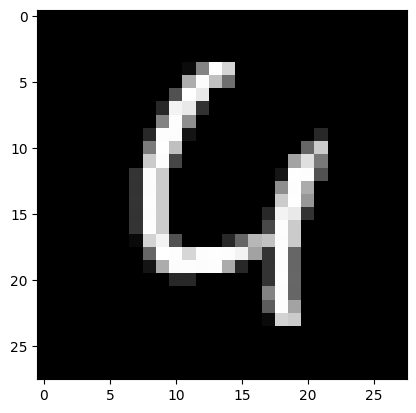

In [9]:
# Batch generation

for i, data in enumerate(train_loader):
  x,y = data
  print(y.shape)
  print(x.shape)
  print(x[0].shape)
  print(y[0])
  plt.imshow(x[0][0].reshape(28,28), cmap='gray')
  break

In [11]:
# Model

class MLP_model(torch.nn.Module):
  def __init__(self, input_size, num_classes):
    super(MLP_model, self).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.fc1 = torch.nn.Linear(input_size, 256)
    self.fc2 = torch.nn.Linear(256, 256)
    self.fc3 = torch.nn.Linear(256, num_classes)
    self.relu = torch.nn.ReLU()

  def forward(self, x):

    fc1 = self.fc1(x)
    ac1 = self.relu(fc1)

    fc2 = self.fc2(ac1)
    ac2 = self.relu(fc2)

    output = self.fc3(ac2)

    return output

In [12]:
# Parameter

# 파라미터 정의
input_size = 784 #28*28
num_classes = 10
num_epochs = 5
learning_rate = 0.1

In [14]:
# Model

# 모델 정의
model = MLP_model(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# Train

# Model Train
loss_list = []
for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.58536
Epoch 2 Loss 0.23130
Epoch 3 Loss 0.16247
Epoch 4 Loss 0.12612
Epoch 5 Loss 0.10145


In [17]:
# Validation

with torch.no_grad():
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader):

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels==predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 97.03000%


In [19]:
# Practice 2. DIGIT recognition with sequential API

In [20]:
# Model

# 모델 정의
linear1 = nn.Linear(784, 256)
linear2 = nn.Linear(256, 64)
linear3 = nn.Linear(64, 10)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3)
model = model.to(device)

In [21]:
# Parameter, loss function, optimizer

# 파라미터, 손실함수, optimizer 정의
epoch = 5
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# Train

# Model Train
loss_list = []
for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 2.06162
Epoch 2 Loss 0.93575
Epoch 3 Loss 0.52100
Epoch 4 Loss 0.41511
Epoch 5 Loss 0.36918


In [23]:
# Validation

with torch.no_grad():
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader):

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels==predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 90.48000%
